# K Nearest Neighbours

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

%matplotlib inline

## Load Iris Dataset

In [2]:
from sklearn.datasets import load_iris
from sklearn.metrics import plot_confusion_matrix

iris = load_iris()

In [3]:
X = pd.DataFrame(iris['data'])

In [4]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
X.columns = ['sepalLength','sepalWidth','petalLength','petalWidth']

In [6]:
X.head()

,sepalLength,sepalWidth,petalLength,petalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
# Load the labels
y = iris['target']

In [8]:
print(iris['target_names'])

['setosa' 'versicolor' 'virginica']


We just care about predicting Virginica

In [9]:
y = (np.array(y)==2).astype(np.int)

In [10]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


## Case Study of K Nearest Neighbours

In [11]:
import HelpfulFunctions as hp
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

### Sepal Length and Sepal Width as Features

In [12]:
featureX = 'sepalLength'
featureY = 'sepalWidth'

In [13]:
X_2 = X[[featureX,featureY]]
y = iris['target']
y = (np.array(y)==2).astype(np.int)

In [14]:
K=3
clf = KNeighborsClassifier(K)
clf.fit(X_2, y)

KNeighborsClassifier(n_neighbors=3)

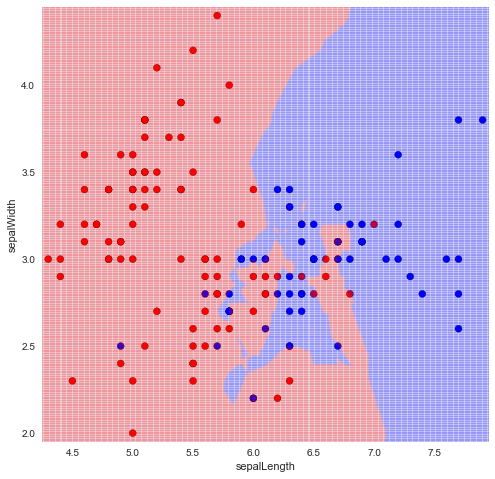

In [15]:
plt.figure(figsize=(8, 8))
hp.featureSpacePlot(featureX,featureY,X,y,clf,plt);

In [16]:
y_pred = clf.predict(X_2)

In [17]:
confusion_matrix(y, y_pred)

array([[86, 14],
       [ 8, 42]], dtype=int64)

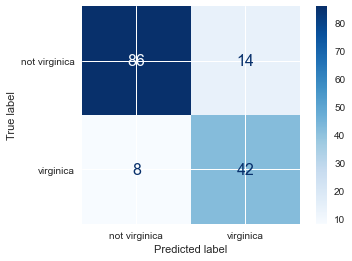

In [19]:
hp.plot_cm(clf, X_2, y, display_labels=['not virginica','virginica']);

### Changing the Weighting

In [20]:
K=3
clf = KNeighborsClassifier(K, weights="distance")
clf.fit(X_2, y)

KNeighborsClassifier(n_neighbors=3, weights='distance')

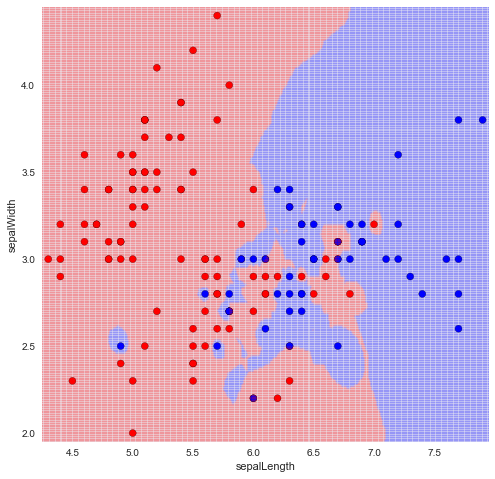

In [21]:
plt.figure(figsize=(8, 8))
hp.featureSpacePlot(featureX,featureY,X_2,y,clf,plt);

In [22]:
y_pred = clf.predict(X_2)

In [23]:
confusion_matrix(y, y_pred)

array([[97,  3],
       [ 8, 42]], dtype=int64)

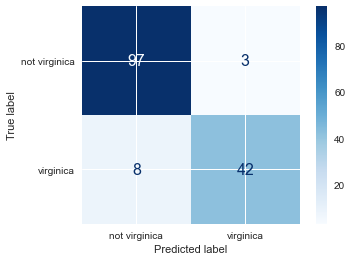

In [24]:
hp.plot_cm(clf, X_2, y, display_labels=['not virginica','virginica'])

## Changing the Value of K and Accuracy

In [25]:
from sklearn.datasets import load_iris
iris = load_iris()

X = pd.DataFrame(iris['data'])
X.columns = ['sepalLength','sepalWidth','petalLength','petalWidth']

In [26]:
y = iris['target']
y = (np.array(y)==2).astype(np.int)

In [27]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

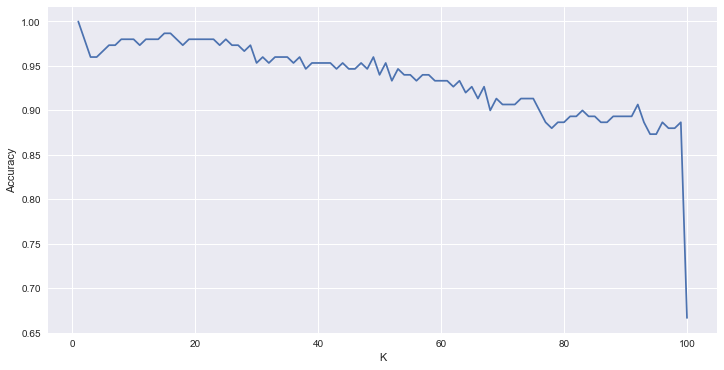

In [28]:
accs = []
ks = []

for k in range(1,101,1):
    knn = KNeighborsClassifier(n_neighbors = k, p=2)
    knn.fit(X, y)
    y_pred = knn.predict(X)
    cm = confusion_matrix(y, y_pred)
    acc = knn.score(X,y)
    ks.append(k)
    accs.append(acc)
    
plt.figure(figsize=(12, 6))
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.plot(ks,accs);

# Multiclass Classification

Let us examine all of the Feature Space Decision Boundaries

In each case we will fit using each combination of the features shown

In [29]:
X = pd.DataFrame(iris['data'])
X.columns = ['sepalLength','sepalWidth','petalLength','petalWidth']

In [30]:
featureX = 'sepalLength'
featureY = 'sepalWidth'
X_2 = X[[featureX,featureY]]

In [31]:
y = iris['target']

In [32]:
clf = KNeighborsClassifier(K,weights='distance')
clf.fit(X_2, y)

KNeighborsClassifier(n_neighbors=3, weights='distance')

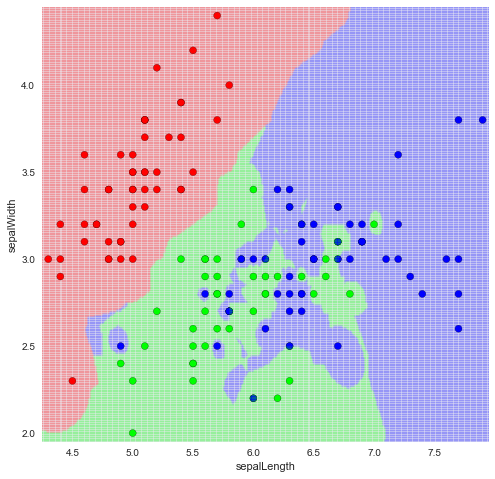

In [33]:
plt.figure(figsize=(8, 8))

hp.featureSpacePlot(featureX,featureY,X,y,clf,plt);

## Generate the Multiclass Confusion Matrix

In [34]:
X = pd.DataFrame(iris['data'])
X.columns = ['sepalLength','sepalWidth','petalLength','petalWidth']

y = iris['target']

In [35]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [36]:
featureX = 'sepalLength'
featureY = 'sepalWidth'

X_2 = X[[featureX,featureY]]

In [37]:
K=20
clf = KNeighborsClassifier(K,weights='distance')
clf.fit(X_2, y)

KNeighborsClassifier(n_neighbors=20, weights='distance')

In [38]:
y_pred = clf.predict(X_2)

In [39]:
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2
 2 2 2 2 1 2 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 2 1 1 2
 2 1]


In [44]:
confusion_matrix(y, y_pred)

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0, 10, 40]], dtype=int64)

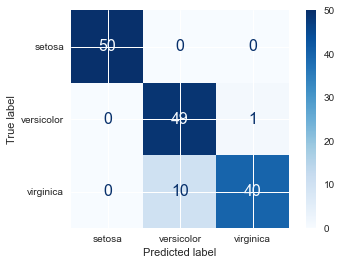

In [42]:
hp.plot_cm(clf, X_2, y, display_labels=['setosa','versicolor','virginica'])